<ipython-input-2-8b0af1b17a82>:12: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, 300)  # 2次元データ生成


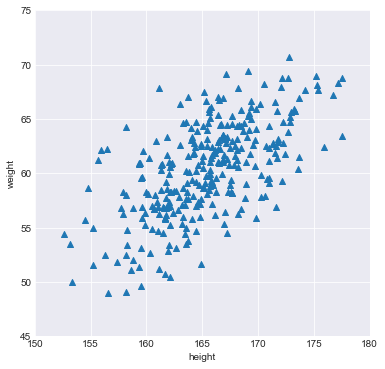

In [2]:
# 必要なライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# 乱数のシードを固定
np.random.seed(0)

# 2次元の正規分布で模擬データ300人分を作成
mean = [165, 60]  # 身長、体重の平均値
cov = [[15, 20], [20, 10]]  # 分散共分散行列
X = np.random.multivariate_normal(mean, cov, 300)  # 2次元データ生成

# グラフを描画
plt.figure(figsize=(6, 6))
plt.scatter(X.T[0], X.T[1], marker='^')
plt.xlim(150, 180)
plt.ylim(45, 75)
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

In [3]:
from sklearn import preprocessing,decomposition

#データの正規化
sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

#主成分分析実施
pca = decomposition.PCA(random_state=0)
pca.fit(X_std)
X_pca = pca.transform(X_std)

#主成分分析結果を見る
print("主成分の分散説明率")
print(pca.explained_variance_ratio_)

print("固有ベクトル")
print(pca.components_)

主成分の分散説明率
[0.81346872 0.18653128]
固有ベクトル
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


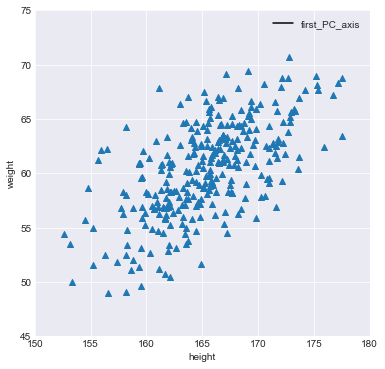

In [4]:
pca_point1 = sc.mean_-sc.inverse_transform(pca.components_)[0]
pca_point2 = sc.mean_-sc.inverse_transform(pca.components_)[0]
pca_point = np.c_[pca_point1,pca_point2]

#データを描画
plt.figure(figsize=(6,6))
plt.scatter(X.T[0],X.T[1],marker="^")
plt.plot(pca_point[0],pca_point[1],color="black",label="first_PC_axis")
plt.xlim(150,180)
plt.ylim(45,75)

plt.xlabel("height")
plt.ylabel("weight")
plt.legend()
plt.show()

In [5]:
# とあるデータをPCAする場合
data = (160, 50)
data_std = sc.transform([data])  # 正規化
data_pca = pca.transform(data_std)  # PCA実施
print(data_pca)

[[ 2.48793062 -0.88428776]]
